# SHAILESH KUMAR

##  Data Science and Business Analytics Tasks.

## Task 4

Exploratory Data Analysis - Terrorism
(Level - Intermediate)

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA? 

● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 

● Dataset: https://bit.ly/2TK5Xn5
        
● Intermediate Level

### Importing the required libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/globalterrorismdb.csv",encoding=('latin1'))
print('data downloaded')
print('shape=',data.shape)
data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data downloaded
shape= (181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Aut

### Displaying the columns and the very basic info using data.info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.shape

(181691, 135)

The dataset has 181691 rows and 135 columns

### Now check for column names.

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Now we will check the percentage of nan values present in each feature

In [ ]:
## 1 -step make the list of features which has missing values

features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

approxdate 0.9491  % missing values
resolution 0.9878  % missing values
provstate 0.0023  % missing values
city 0.0024  % missing values
latitude 0.0251  % missing values
longitude 0.0251  % missing values
specificity 0.0  % missing values
location 0.6946  % missing values
summary 0.364  % missing values
alternative 0.8403  % missing values
alternative_txt 0.8403  % missing values
attacktype2 0.9652  % missing values
attacktype2_txt 0.9652  % missing values
attacktype3 0.9976  % missing values
attacktype3_txt 0.9976  % missing values
targsubtype1 0.0571  % missing values
targsubtype1_txt 0.0571  % missing values
corp1 0.2342  % missing values
target1 0.0035  % missing values
natlty1 0.0086  % missing values
natlty1_txt 0.0086  % missing values
targtype2 0.9387  % missing values
targtype2_txt 0.9387  % missing values
targsubtype2 0.9412  % missing values
targsubtype2_txt 0.9412  % missing values
corp2 0.9443  % missing values
target2 0.9393  % missing values
natlty2 0.9404  % missing va

### From the above output, we can see above most have the columns have missing vales of more than 50%


In [ ]:
df = data.isnull().sum()
df.head(10)

eventid             0
iyear               0
imonth              0
iday                0
approxdate     172452
extended            0
resolution     179471
country             0
country_txt         0
region              0
dtype: int64

In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
data.duplicated().sum()

0

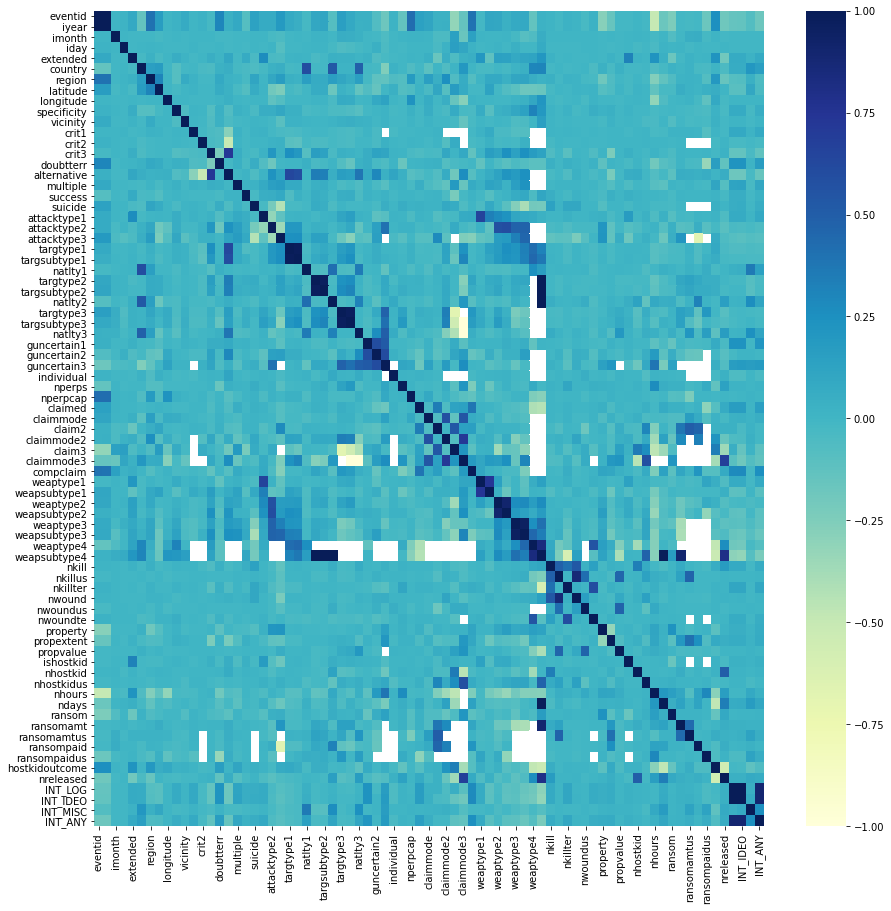

In [ ]:
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data= corr, cmap="YlGnBu")
plt.show()

In [ ]:
plt.close()

#### The country with higest number of attacks 

In [ ]:
data['country_txt'].value_counts().index[0]

'Iraq'

#### Top 10 countries higest number of attacks 

In [ ]:
data['country_txt'].value_counts().index[:4]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India'], dtype='object')

#### Region with higest number of attacks

In [ ]:
data['region_txt'].value_counts().index[0]

'Middle East & North Africa'

#### Top 3 regions with most attacks 

In [ ]:
data['region_txt'].value_counts().index[:4]

Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa'],
      dtype='object')

In [ ]:
print('Maximum number of people that were killed by a single terrorist attack were',data['nkill'].max(),'people, which took place in',data.loc[data['nkill'].idxmax()].country_txt)

Maximum number of people that were killed by a single terrorist attack were 1570.0 people, which took place in Iraq


### Top countries with higest number of deaths due to terrorist attacks

In [ ]:
people_died = data[["country_txt","nkill"]].groupby('country_txt').sum()
people_died.head(10)

,nkill
country_txt,
Afghanistan,39384.0
Albania,42.0
Algeria,11066.0
Andorra,0.0
Angola,3043.0
Antigua and Barbuda,0.0
Argentina,490.0
Armenia,37.0
Australia,23.0


In [ ]:
people_died = data[["iyear","nkill"]].groupby('iyear').sum()

Text(0.5, 1.0, 'Number of people died with respect to years')

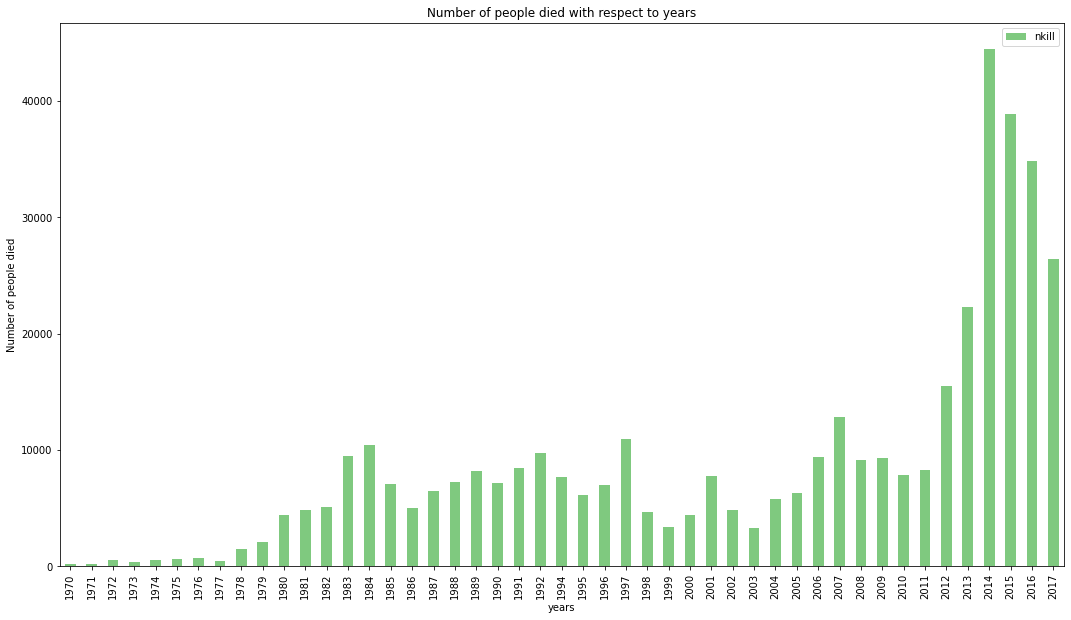

In [ ]:
people_died.plot(kind='bar',colormap='Accent',figsize=(18,10))
plt.xlabel('years')
plt.ylabel('Number of people died')
plt.title('Number of people died with respect to years')

In [ ]:
attack_type = data[["attacktype1_txt","nkill"]].groupby('attacktype1_txt').sum()

Text(0.5, 1.0, 'Number of people died with respect to Attack type')

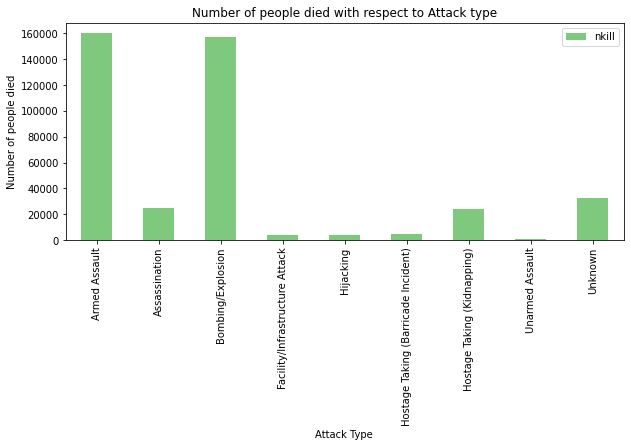

In [ ]:
attack_type.plot(kind='bar',figsize=(10,4),colormap='Accent')
plt.xlabel('Attack Type ')
plt.ylabel('Number of people died')
plt.title('Number of people died with respect to Attack type')

In [ ]:
region  = data[["region_txt","nkill"]].groupby('region_txt').sum()

Text(0.5, 1.0, 'Number of people died with respect to Region')

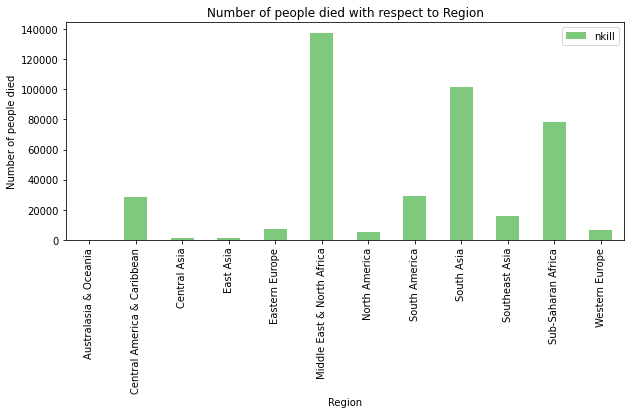

In [ ]:
region.plot(kind='bar',figsize=(10,4),colormap='Accent')
plt.xlabel('Region')
plt.ylabel('Number of people died')
plt.title('Number of people died with respect to Region')

In [ ]:
weapon = data[["weaptype1_txt","nkill"]].groupby('weaptype1_txt').sum()

Text(0.5, 1.0, 'Number of people died with respect to Weapon used')

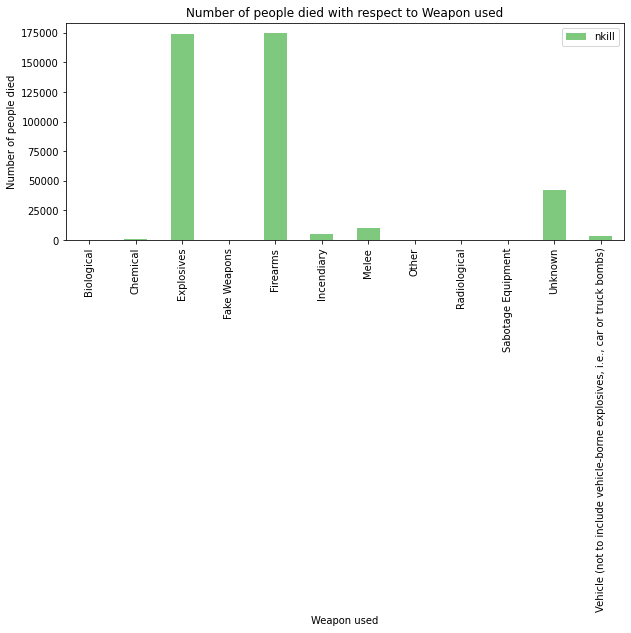

In [ ]:
weapon.plot(kind='bar',figsize=(10,4),colormap='Accent')
plt.xlabel('Weapon used')
plt.ylabel('Number of people died')
plt.title('Number of people died with respect to Weapon used')

In [ ]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

In [ ]:
filterYear = data['iyear'] == 1970
filterData = data[filterYear] 

reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() # droping NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=3)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map.save("/content/drive/My Drive/Colab Notebooks/terror1970")
map

In [ ]:
filterYear = data['iyear'] == 2017
filterData = data[filterYear] 

reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() # droping NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=3)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map.save("/content/drive/My Drive/Colab Notebooks/terror1970")
map

Text(0.5, 1.0, 'Frequecy of  target  over the years')

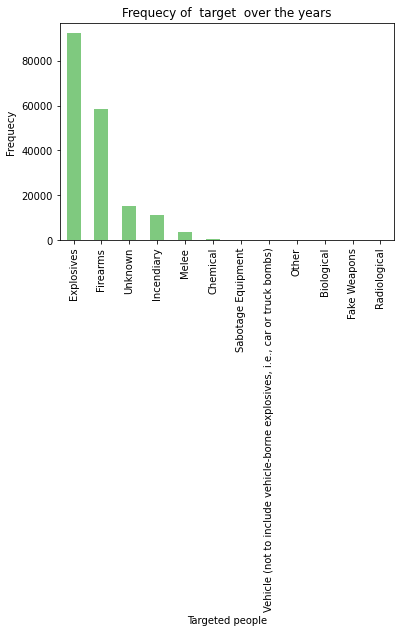

In [ ]:
data['weaptype1_txt'].value_counts().plot(kind='bar',cmap ="Accent")
plt.xlabel('Targeted people')
plt.ylabel('Frequecy ')
plt.title('Frequecy of  target  over the years')


Text(0.5, 1.0, 'Frequecy of  target  over the years')

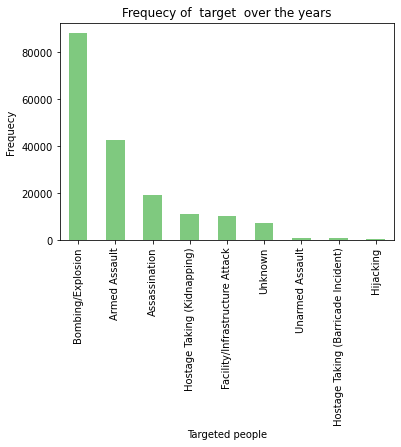

In [ ]:
data['attacktype1_txt'].value_counts().plot(kind='bar',cmap ="Accent")
plt.xlabel('Targeted people')
plt.ylabel('Frequecy ')
plt.title('Frequecy of  target  over the years')

Text(0.5, 1.0, 'Frequecy of  target  over the years')

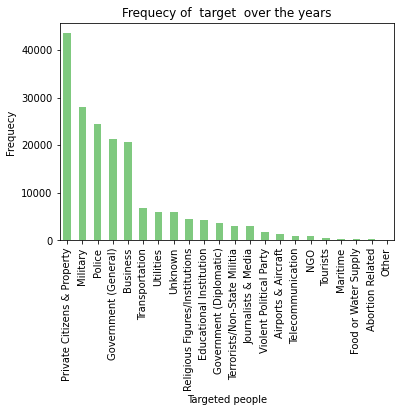

In [ ]:
data['targtype1_txt'].value_counts().plot(kind='bar',cmap ="Accent")
plt.xlabel('Targeted people')
plt.ylabel('Frequecy ')
plt.title('Frequecy of  target  over the years')

In [ ]:
reg = data['region'].value_counts().index[:5]
reg1 = data['region_txt'].value_counts().index[:5]
dic ={}
for each in range(0,5):
  dic[reg[each]] = reg1[each]

In [ ]:
def plot(area,name):
    middleEastData = data[data['region'] == area]
    middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (10,5), color = 'red', fontsize=15)
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title(name)
    plt.show()

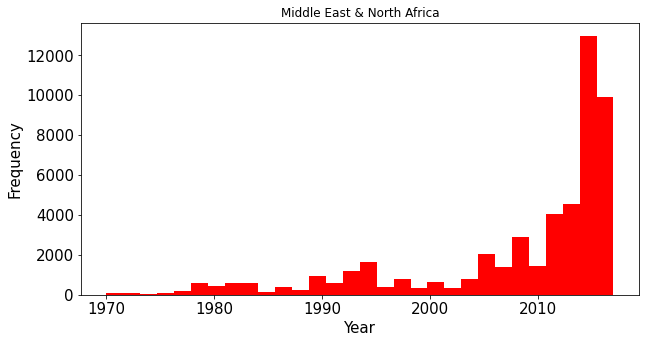

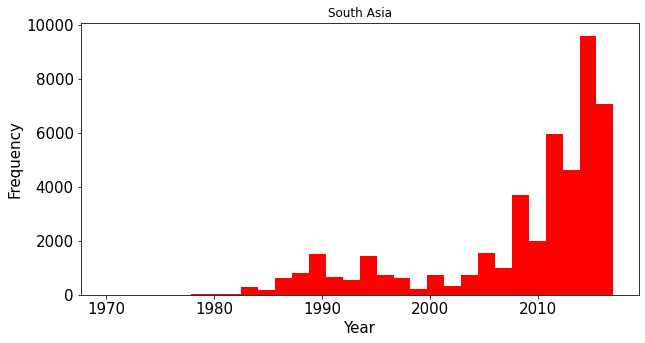

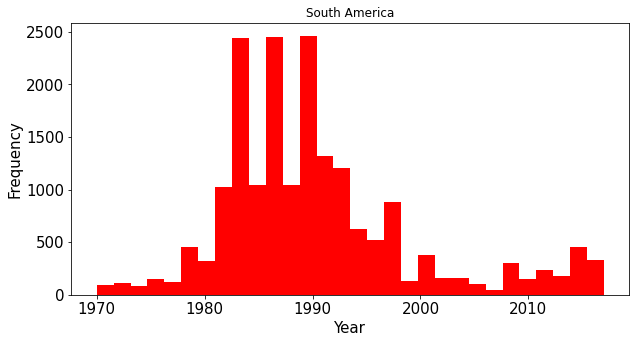

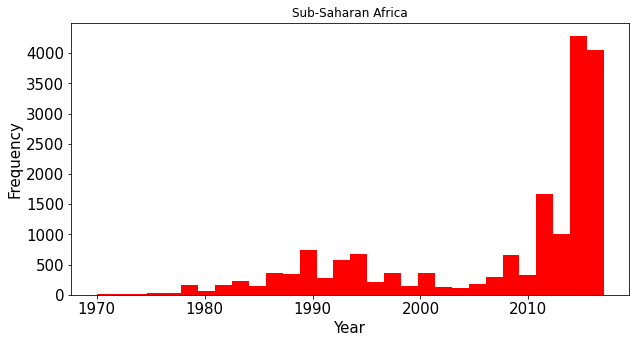

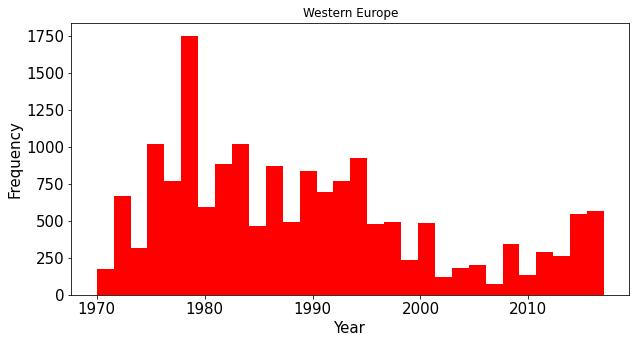

In [ ]:
for num in dic.keys():
    plot(num,dic[num])